# Natural Language Processing with Python for ML

### Download NLTK data

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Read in semi-structured text data

In [6]:
# Read in the raw text
rawData = open("./Datasets/SMSSpamCollection.tsv").read()

# Print the raw data
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

### Clean the data

We will first replace the "\t" characters with "\n" then split based on "\t"

In [7]:
parsedData = rawData.replace('\t', '\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

Next we will create a list of all labels and a list of all text entries 

In [9]:
labelList = parsedData[0::2]
textList = parsedData[1::2]
# Check the data
print("- Check the first 5 labels:")
print(labelList[0:5])
print("\n- Check the first 5 text entries:")
print(textList[0:5])
# Check the dimensions
print("\n- Check the length of the labels: {}".format(len(labelList)))
print("\n- Check the length of the text enteries: {}".format(len(textList)))

- Check the first 5 labels:
['ham', 'spam', 'ham', 'ham', 'ham']

- Check the first 5 text entries:
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']

- Check the length of the labels: 5571

- Check the length of the text enteries: 5570


Transform the data into a dataframe:

In [7]:
import pandas as pd
fullCorpus = pd.DataFrame({
    'label': labelList[:-1],
    'body_list': textList
})

fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Another way to import the data directly from the csv file:

In [8]:
fullCorpus = pd.read_csv("./Datasets/SMSSpamCollection.tsv", sep="\t", header=None)
fullCorpus.columns = ['label', 'body_text']
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Explore the dataset

In [9]:
# Check the dimensions
print("The input data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

The input data has 5568 rows and 2 columns


In [10]:
# How many spam/ham are there?
print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus),
                                                       len(fullCorpus[fullCorpus['label']=='spam']),
                                                       len(fullCorpus[fullCorpus['label']=='ham'])))

Out of 5568 rows, 746 are spam, 4822 are ham


### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. **Lemmatize/Stem**

Note that lemmatizing and stemming are helpful but not critical.

In [4]:
import pandas as pd
# Max width of columns when dispalying datasets
pd.set_option('display.max_colwidth', 100)
# Import dataset and set column names
data = pd.read_csv("./Datasets/SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### Remove punctuation

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
# Define a function that remove punctuation from a single sentence
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

# Apply it to the whole dataset
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))
# Display the resulting dataset
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


#### Tokenization

In [31]:
import re

# Define a function that produces tokens based on a single sentence
def tokenize(text):
    tokens = re.split('\W+', text.lower())
    return tokens

# Apply it to the whole dataset
data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x))
# Display the resulting dataset
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


#### Remove stopwords

In [33]:
import nltk
# List of stopwords in English
stopword = nltk.corpus.stopwords.words('english')
print("- Number of stop words in English: {}".format(len(stopword)))
print(stopword[:len(stopword):10])

- Number of stop words in English: 179
['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [34]:
# Define a function that remove stopwords from a list of tokens
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

# Apply it to the whole dataset
data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
# Display the resulting dataset
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### Punctuation and stopwords removal and tokenization can all be done using one function

In [35]:
# Preliminary steps
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')

# Function that perform punctuation and stopwords removal and tokenization
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

# Apply it to the whole dataset
data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))
# Display the resulting dataset
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### Use Stemming (Porter stemmer)

In [36]:
import nltk
ps = nltk.PorterStemmer()
# List of methods of the PorterStemmer
print(dir(ps))

['MARTIN_EXTENSIONS', 'NLTK_EXTENSIONS', 'ORIGINAL_ALGORITHM', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_abc_impl', '_apply_rule_list', '_contains_vowel', '_ends_cvc', '_ends_double_consonant', '_has_positive_measure', '_is_consonant', '_measure', '_replace_suffix', '_step1a', '_step1b', '_step1c', '_step2', '_step3', '_step4', '_step5a', '_step5b', 'mode', 'pool', 'stem', 'unicode_repr', 'vowels']


In [37]:
# Test the Porter stemmer
# GROW stem
print("GROW stem:")
print("- grows becomes {}".format(ps.stem('grows')))
print("- growing becomes {}".format(ps.stem('growing')))
print("- grow becomes {}".format(ps.stem('grow')))
# RUN stem
print("RUN stem:")
print("- run becomes {}".format(ps.stem('run')))
print("- running becomes {}".format(ps.stem('running')))
print("- runner becomes {}".format(ps.stem('runner')))

GROW stem:
- grows becomes grow
- growing becomes grow
- grow becomes grow
RUN stem:
- run becomes run
- running becomes run
- runner becomes runner


In [38]:
# Function that transform words into their stems
def steming(tokenized_text):
    stem_list = [ps.stem(word) for word in tokenized_text]
    return stem_list

# Apply it to the whole dataset
data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: steming(x))
# Disply the first 5 rows
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


#### Use a Lemmatizer ([WordNet](https://wordnet.princeton.edu/))

In [39]:
import nltk

# Lemmatizer and Stemmer
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

# List of methods of WordNet lemmatizer
print(dir(wn))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', 'lemmatize', 'unicode_repr']


In [40]:
# Difference between WordNetLemmatizer and PorterStemmer
# Stemmer
print("Stemmer for goose/geese:")
print("- goose becomes {}".format(ps.stem('goose')))
print("- geese becomes {}".format(ps.stem('geese')))
# Lemmatizer
print("Lemmatizer for goose/geese:")
print("- goose becomes {}".format(wn.lemmatize('goose')))
print("- geese becomes {}".format(wn.lemmatize('geese')))

Stemmer for goose/geese:
- goose becomes goos
- geese becomes gees
Lemmatizer for goose/geese:
- goose becomes goose
- geese becomes goose


In [41]:
# Function that transform words into their lemma
def lemmatizing(tokenized_text):
    lemma_list = [wn.lemmatize(word) for word in tokenized_text]
    return lemma_list

# Apply it to the whole dataset
data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))
# Disply the first 5 rows
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


### Count Vectorization

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

#### Read in text

In [56]:
# Preliminary steps
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)
ps = nltk.PorterStemmer()
# List of stop words
stopwords = nltk.corpus.stopwords.words('english')
# Load data
data = pd.read_csv("./Datasets/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

#### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [57]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#### Apply CountVectorizer

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialise CountVectoriser based on the text cleaning function we've just created
count_vect = CountVectorizer(analyzer=clean_text)
# Create the document-term matrix based on counts
X_counts = count_vect.fit_transform(data['body_text'])
# Display the dimension of the resulting matrix
print(f'The dimension of the document-term matrix is: {X_counts.shape}')
# Display the first 20 column names (terms) 
print("- The first 20 column names:")
print(count_vect.get_feature_names()[:20])

The dimension of the document-term matrix is: (5567, 8104)
- The first 20 column names:
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06']


#### Output sparse matrices

_A sparse matrix is a matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [59]:
# Information we get when we type the name of the document-term matrix
X_counts

<5567x8104 sparse matrix of type '<class 'numpy.int64'>'
	with 50122 stored elements in Compressed Sparse Row format>

In [60]:
# Display some enteries of the matrix
X_counts_df = pd.DataFrame(X_counts.toarray())
# Add column names
X_counts_df.columns = count_vect.get_feature_names()
# Display the matrix
X_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### N-gram Vectorization

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

#### Read in text

In [3]:
# Preliminary steps
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)
ps = nltk.PorterStemmer()
# List of stop words
stopwords = nltk.corpus.stopwords.words('english')
# Load data
data = pd.read_csv("./Datasets/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

#### Clean the text

In [4]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

# Apply the function to clean the text
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


#### Apply CountVectorizer based on n-grams

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialise CountVectoriser based on the text cleaning function we've just created
ngram_vect = CountVectorizer(ngram_range=(2,2))
# Create the document-term matrix based on counts
X_counts = ngram_vect.fit_transform(data['cleaned_text'])
# Display the dimension of the resulting matrix
print(f'- The dimension of the document-term matrix is: {X_counts.shape}')
# Display the first 20 column names (terms) 
print("- The first 20 column names:")
print(ngram_vect.get_feature_names()[:20])

- The dimension of the document-term matrix is: (5567, 31260)
- The first 20 column names:
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul']


#### Output sparse matrices

In [154]:
# Information we get when we type the name of the document-term matrix
X_counts

<5567x31260 sparse matrix of type '<class 'numpy.int64'>'
	with 43714 stored elements in Compressed Sparse Row format>

In [155]:
# Display some enteries of the matrix
X_counts_df = pd.DataFrame(X_counts.toarray())
# Add column names
X_counts_df.columns = ngram_vect.get_feature_names()
# Display the matrix
X_counts_df.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF (Term frequency-inverse document frequency)

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

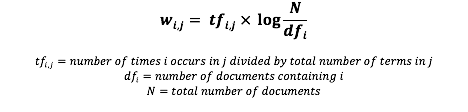

Here $i$ refers to terms (words) and $j$ refers to rows (sentences)

#### Read in text

In [11]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("./Datasets/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

#### Clean the text

In [14]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# Apply the function to clean the text
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


#### Apply TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialise CountVectoriser based on the text cleaning function we've just created
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
# Create the document-term matrix based on counts
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
# Display the dimension of the resulting matrix
print(f'- The dimension of the document-term matrix is: {X_tfidf.shape}')
# Display the first 20 column names (terms) 
print("- The first 20 column names:")
print(tfidf_vect.get_feature_names()[:20])

- The dimension of the document-term matrix is: (5567, 8104)
- The first 20 column names:
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06']


#### Output sparse matrices

In [16]:
# Information we get when we type the name of the document-term matrix
X_tfidf

<5567x8104 sparse matrix of type '<class 'numpy.float64'>'
	with 50122 stored elements in Compressed Sparse Row format>

In [18]:
# Display some enteries of the matrix
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
# Add column names
X_tfidf_df.columns = tfidf_vect.get_feature_names()
# Display the matrix
X_tfidf_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering: Feature Creation

Here we add some features like text length and the percentage of punctuation to have a better chance to predict well the response variable. 

#### Read in text

In [21]:
import pandas as pd

data = pd.read_csv(".\Datasets\SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

#### Create feature for text message length

In [33]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,text_length,punct%,body_length,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7,128,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1,49,49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2,62,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,28,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4,135,135


#### Create feature for percentage of text that is punctuation

In [25]:
import string

# Function that compute the percentage of puctuation in a string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

# Apply to our dataset
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
# Display first rows
data.head()

,label,body_text,text_length,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


#### Evaluate created features

In [30]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


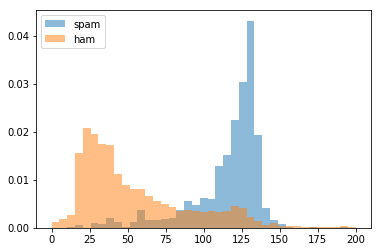

In [34]:
# Histograms comparing the length of spam and ham messages
bins = np.linspace(0, 200, 40)
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


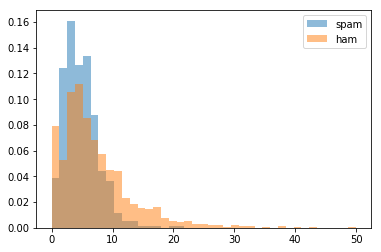

In [36]:
# Histograms comparing the puctuation percentages of spam and ham messages
bins = np.linspace(0, 50, 40)
pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

### Feature Engineering: Transformations

#### Box-Cox Power Transformation

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

#### Plot the two features but this time considering all types of messages

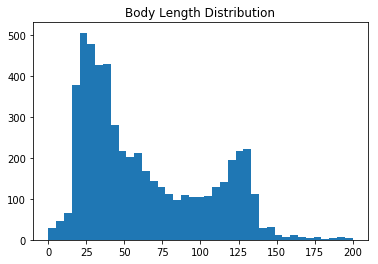

In [37]:
# Histograms depicting the length of messages
bins = np.linspace(0, 200, 40)
pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

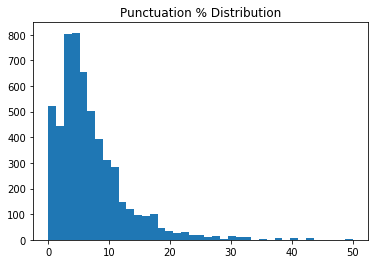

In [38]:
# Histograms depicting the the puctuation percentage
bins = np.linspace(0, 50, 40)
pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

#### Choosing the power transformation to use

In [ ]:
for i in range(1,6):
    pyplot.hist(data['punct%']**(1/i), bins = 40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

## Random Forest model

### Building a basic Random Forest model

Here we will explore the basic steps to follow in order to build a random forest model. Later we will discuss how to perform cross-validation to select good hyperparameters.

#### Read in & clean text

In [8]:
import nltk
import pandas as pd
import re
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string

# List of stop words + initialise the Porter stemmer
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

# Import the dataset
data = pd.read_csv("./Datasets/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

# Add text length and punct percentage features
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

# Function to clean the text data
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# Initialise CountVectoriser based on the text cleaning function we've just created
count_vect = CountVectorizer(analyzer=clean_text)
# Create the document-term matrix based on counts
X_counts = count_vect.fit_transform(data['body_text'])

#tfidf_vect = TfidfVectorizer(analyzer=clean_text)
#X_tfidf = tfidf_vect.fit_transform(data['body_text'])

# Display some enteries of the matrix
X_counts_df = pd.DataFrame(X_counts.toarray())
# Add column names
X_counts_df.columns = count_vect.get_feature_names()

# Construct the feature matrix by adding the text length and punct percentage features to the count features
X_features = pd.concat([data['body_len'], data['punct%'], X_counts_df], axis=1)
X_features.head()

,body_len,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Explore RandomForestClassifier Attributes & Hyperparameters

In [3]:
from sklearn.ensemble import RandomForestClassifier
# List of methods available with the random forest classifier
print(dir(RandomForestClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


The most important useful methods are 'feature_importances_', 'fit' and 'predict'

In [4]:
# Display the parameters requires to run the RandomForestClassifier()
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


We would usually play with the parameters max_depth (max depth of each tree) and n_estimator (number of trees). Use n_jobs=-1 to run the model in parallel

### Explore RandomForestClassifier through Cross-Validation

In [5]:
# Import necessary methods
from sklearn.model_selection import KFold, cross_val_score

In [9]:
# Run RF with 5 fold-CV
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.96947935, 0.96947935, 0.9703504 , 0.96046721, 0.96585804])

### Explore RandomForestClassifier through Holdout Set

In [10]:
# Import necessary methods
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [11]:
# Divide into training and test sets. The same order has to always be respected
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [12]:
# Run a random forest model in parallel with 50 trees and a max depth of 20. 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [13]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.06078235369516432, 'body_len'),
 (0.03874973871451262, 'mobil'),
 (0.03376640454233298, 'call'),
 (0.03000027947536334, 'claim'),
 (0.029951654279227316, 'txt'),
 (0.025132708469617876, 'stop'),
 (0.02399443933589941, 'text'),
 (0.023145369093081847, 'prize'),
 (0.017228589987067933, 'free'),
 (0.016521259649633795, 'servic')]

In [15]:
# Generate predictions from the test features
y_pred = rf_model.predict(X_test)
# Compute accuracy, precision and recall
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.593 / Accuracy: 0.941


### Exploring parameter settings by building our own Grid-search

In [16]:
# Import necessary methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [17]:
# Divide into training and test sets. The same order has to always be respected
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [18]:
# Define a function that compute precision, recall and accuracy for certain values of n_est and depth, then print the results 
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [19]:
# Compute perf measures for a set of 12 possible param combination
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.235 / Accuracy: 0.907
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.529 / Accuracy: 0.943
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.632 / Accuracy: 0.955
Est: 10 / Depth: None ---- Precision: 1.0 / Recall: 0.728 / Accuracy: 0.967
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.235 / Accuracy: 0.907
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.537 / Accuracy: 0.943
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.632 / Accuracy: 0.955
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.772 / Accuracy: 0.972
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.206 / Accuracy: 0.903
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.544 / Accuracy: 0.944
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.647 / Accuracy: 0.957
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.765 / Accuracy: 0.971


### Exploring parameter settings using GridSearchCV

In [20]:
# Import necessary methods
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
# Perform a grid seach with CV using GridSearchCV from sklearn

# Initialise the random forest classifier
rf = RandomForestClassifier()
# Parameters to explore
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}
# Perform the grid search
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,46.480312,1.717683,0.493458,0.132369,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978475,0.973944,0.973944,...,0.973235,0.003198,1,0.999102,0.999102,0.998877,0.998877,0.998877,0.998967,0.000110
11,44.023886,2.976516,0.446022,0.100949,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978475,0.973944,0.973944,...,0.973056,0.003561,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,2.800745,0.248674,0.171541,0.051096,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.978475,0.976640,0.972147,...,0.972696,0.004361,3,0.997978,0.997081,0.998653,0.998428,0.996408,0.997710,0.000845
7,23.380753,0.617691,0.354813,0.070821,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976682,0.972147,0.973944,...,0.972337,0.003577,4,0.999102,0.998877,0.998877,0.999102,0.998653,0.998922,0.000168
10,24.043070,1.111407,0.449541,0.107369,None,150,"{'max_depth': None, 'n_estimators': 150}",0.974888,0.973944,0.974843,...,0.972157,0.003416,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## Gradient boosting model

### Building a basic Gradient boosting model

Here we will explore the basic steps to follow in order to build a gradient boosting model. Later we will discuss how to perform cross-validation to select good hyperparameters.

#### Read in & clean text

In [6]:
import nltk
import pandas as pd
import re
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string

# List of stop words + initialise the Porter stemmer
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

# Import the dataset
data = pd.read_csv("./Datasets/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

# Add text length and punct percentage features
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

# Function to clean the text data
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# Initialise CountVectoriser based on the text cleaning function we've just created
count_vect = CountVectorizer(analyzer=clean_text)
# Create the document-term matrix based on counts
X_counts = count_vect.fit_transform(data['body_text'])

# Display some enteries of the matrix
X_counts_df = pd.DataFrame(X_counts.toarray())
# Add column names
X_counts_df.columns = count_vect.get_feature_names()

# Construct the feature matrix by adding the text length and punct percentage features to the count features
X_features = pd.concat([data['body_len'], data['punct%'], X_counts_df], axis=1)
X_features.head()

,body_len,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Explore GradientBoostingClassifier Attributes & Hyperparameters

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
# List of methods available with the random forest classifier
print(dir(GradientBoostingClassifier))

C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


['_SUPPORTED_LOSS', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_initialized', '_check_params', '_clear_state', '_decision_function', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_init_decision_function', '_init_state', '_is_initialized', '_make_estimator', '_resize_state', '_staged_decision_function', '_validate_estimator', '_validate_y', 'apply', 'decision_function', 'feature_importances_', 'fit', 'get_params', 'n_features', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params', 'staged_decision_function', 'staged_predict', 'staged_predic

C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


The most important useful methods are 'feature_importances_', 'fit' and 'predict'

In [3]:
# Display the parameters requires to run the GradientBoostingClassifier()
print(GradientBoostingClassifier())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


We would usually play with the parameters learning_rate, max_depth (max depth of each tree) and n_estimator (number of trees). Gradient boosting cannot be parallelised

### Explore GradientBoostingClassifier through Cross-Validation

In [4]:
# Import necessary methods
from sklearn.model_selection import KFold, cross_val_score

C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\model_selection\_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [7]:
# Run RF with 5 fold-CV
gb = GradientBoostingClassifier()
k_fold = KFold(n_splits=5)
cross_val_score(gb, X_features, data['label'], cv=k_fold, scoring='accuracy')

array([0.96140036, 0.97307002, 0.96226415, 0.95597484, 0.9541779 ])

### Explore GradientBoostingClassifier through Holdout Set

In [8]:
# Import necessary methods
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [9]:
# Divide into training and test sets. The same order has to always be respected
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [11]:
# Run a GBM with a learning rate of 0.1, 100 trees and a max depth of 10. 
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators=100, max_depth=10)
gb_model = gb.fit(X_train, y_train)

In [12]:
sorted(zip(gb_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.100107347481215, 'body_len'),
 (0.03823685305955173, 'call'),
 (0.028422968464892923, 'txt'),
 (0.015269302465387354, 'user'),
 (0.01450590916417374, 'text'),
 (0.014032134369035856, '88066'),
 (0.012703969197119995, 'free'),
 (0.012685110772297028, 'httpalto18coukwavewaveaspo44345'),
 (0.012559907312523792, 'punct%'),
 (0.012275034392939397, 'bid')]

In [13]:
# Generate predictions from the test features
y_pred = gb_model.predict(X_test)
# Compute accuracy, precision and recall
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.928 / Recall: 0.823 / Accuracy: 0.969


### Exploring parameter settings by building our own Grid-search

In [15]:
# Import necessary methods
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [16]:
# Divide into training and test sets. Carful with the order
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [17]:
# Define a function that compute precision, recall and accuracy for certain values of n_est and depth, then print the results 
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [7]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

/Users/djedamski/.pyenv/versions/3.5.3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.868
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 1.0 / Recall: 0.687 / Accuracy: 0.959
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.88 / Recall: 0.796 / Accuracy: 0.959
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.868
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.968 / Recall: 0.83 / Accuracy: 0.974
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.917 / Recall: 0.823 / Accuracy: 0.967
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.027 / Accuracy: 0.872
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.962 / Recall: 0.871 / Accuracy: 0.978
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.926 / Recall: 0.85 / Accuracy: 0.971
Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.868
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.977 / Recall: 0.857 / Accuracy: 0.978
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.919 / Recall: 0.85 / Accuracy: 0.97

### Exploring parameter settings using GridSearchCV

In [2]:
# Import necessary methods
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
# defining parameter values to input to the GridSearchCV() function 
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}
# Run a Grid search
clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_features, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
5,368.558762,0.308644,0.969643,1.0,0.1,11,150,"{'n_estimators': 150, 'learning_rate': 0.1, 'm...",1,0.965919,...,0.966757,1.0,0.968553,1.0,0.969452,1.0,7.128055,0.030754,0.004141,0.0
2,214.185205,0.303001,0.969283,1.0,0.1,7,150,"{'n_estimators': 150, 'learning_rate': 0.1, 'm...",2,0.965919,...,0.968553,1.0,0.964960,1.0,0.967655,1.0,2.241176,0.043978,0.005181,0.0
8,381.475534,0.206334,0.968744,1.0,0.1,15,150,"{'n_estimators': 150, 'learning_rate': 0.1, 'm...",3,0.965022,...,0.969452,1.0,0.965858,1.0,0.967655,1.0,44.316129,0.036329,0.003816,0.0
1,157.876316,0.351555,0.968205,1.0,0.1,7,100,"{'n_estimators': 100, 'learning_rate': 0.1, 'm...",4,0.965919,...,0.968553,1.0,0.964960,1.0,0.965858,1.0,3.158135,0.187909,0.003954,0.0
7,353.960683,0.258787,0.968205,1.0,0.1,15,100,"{'n_estimators': 100, 'learning_rate': 0.1, 'm...",4,0.964126,...,0.969452,1.0,0.966757,1.0,0.967655,1.0,10.086312,0.056744,0.002968,0.0


### Correct way to run RF/GBM

Actually, the right way to train the models with train/test sets is to split the data first, then fit the count vectorizer. Previously, we did things in the inverse order. so next we will perform parameter tuning based on RF using the correct approach

#### Read in & clean text

In [1]:
import nltk
import pandas as pd
import re
import string

# List of stop words + initialise the Porter stemmer
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

# Import the dataset
data = pd.read_csv("./Datasets/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

# Add text length and punct percentage features
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

# Function to clean the text data
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\model_selection\_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [12]:
# Import necessary methods
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

# Divide into training and test sets. Careful with the order
X_train0, X_test0, y_train0, y_test0 = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialise CountVectoriser based on the text cleaning function we've just created
count_vect = CountVectorizer(analyzer=clean_text)
# The document-term matrix will be based on training set only
count_vect_fit = count_vect.fit(X_train0['body_text'])
# Create the training and test document-term matrices based on counts
X_count_train = count_vect_fit.transform(X_train0['body_text'])
X_count_test = count_vect_fit.transform(X_test0['body_text'])
# Transform them into dataframes
X_count_train_df = pd.DataFrame(X_count_train.toarray())
X_count_test_df = pd.DataFrame(X_count_test.toarray())
# Add column names
X_count_train_df.columns = count_vect.get_feature_names()
X_count_test_df.columns = count_vect.get_feature_names()
# Create the final training and test sets by adding the text length and punct percentage features to the count features
X_train = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           X_count_train_df], axis=1)
X_test = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           X_count_test_df], axis=1)
y_train = y_train0
y_test = y_test0
# Display some enteries of the training matrix
X_train.head()

,body_len,punct%,,0,008704050406,0089mi,0121,01223585236,02,020603,...,zed,zero,zhong,zoe,zogtoriu,zoom,é,ü,üll,〨ud
0,20,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,109,5.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,71,2.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,138,5.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,2.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train.shape

(4453, 7152)

### Exploring parameter settings using GridSearchCV

In [9]:
# Import necessary methods
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
# Perform a grid seach with CV using GridSearchCV from sklearn

# Initialise the random forest classifier
rf = RandomForestClassifier()
# Parameters to explore
param = {'n_estimators': [150, 300],
        'max_depth': [60, 90, None]}
# Perform the grid search
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train0)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Adnane\Anaconda3\envs\CompletePython\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,32.189965,4.854063,0.271639,0.063503,None,300,"{'max_depth': None, 'n_estimators': 300}",0.973064,0.976431,0.977553,...,0.972603,0.004416,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,15.254711,0.222709,0.171984,0.016924,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.974186,0.973064,0.978676,...,0.972154,0.005140,2,0.998877,0.998596,0.999439,0.998596,0.998878,0.998877,0.000308
4,16.775035,0.475367,0.210819,0.048741,None,150,"{'max_depth': None, 'n_estimators': 150}",0.974186,0.974186,0.978676,...,0.972154,0.005240,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,29.075604,0.341039,0.326526,0.069007,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.971942,0.975309,0.977553,...,0.971704,0.004683,4,0.998877,0.998316,0.998877,0.998877,0.998597,0.998709,0.000225
0,11.776272,0.496094,0.160484,0.025549,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.973064,0.970819,0.974186,...,0.968561,0.005730,5,0.992981,0.992701,0.991297,0.993543,0.992705,0.992645,0.000741


### Final evaluation of models

Here we will compare the best RF model and the best GBM obtained after tweaking the parameters of each of them.

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [25]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test0, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 9.525 / Predict time: 0.198 ---- Precision: 0.119 / Recall: 0.053 / Accuracy: 0.895


In [27]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test0, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 180.528 / Predict time: 0.13 ---- Precision: 0.092 / Recall: 0.072 / Accuracy: 0.905
